In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
data = pd.read_csv("GDP.csv")

In [3]:
from ydata_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='India_GDP.html')

C:\Users\shivy\AppData\Roaming\Python\Python39\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\shivy\anaconda3\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data.head()

,Year,GDP
0,1961,3.870910e+10
1,1962,4.159907e+10
2,1963,4.777600e+10
3,1964,5.572687e+10
4,1965,5.876042e+10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    61 non-null     int64  
 1   GDP     61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [6]:
data['GDP'].describe()

count    6.100000e+01
mean     7.049446e+11
std      8.677598e+11
min      3.870910e+10
25%      1.010000e+11
50%      2.920000e+11
75%      9.200000e+11
max      3.180000e+12
Name: GDP, dtype: float64

<Axes: xlabel='Year'>

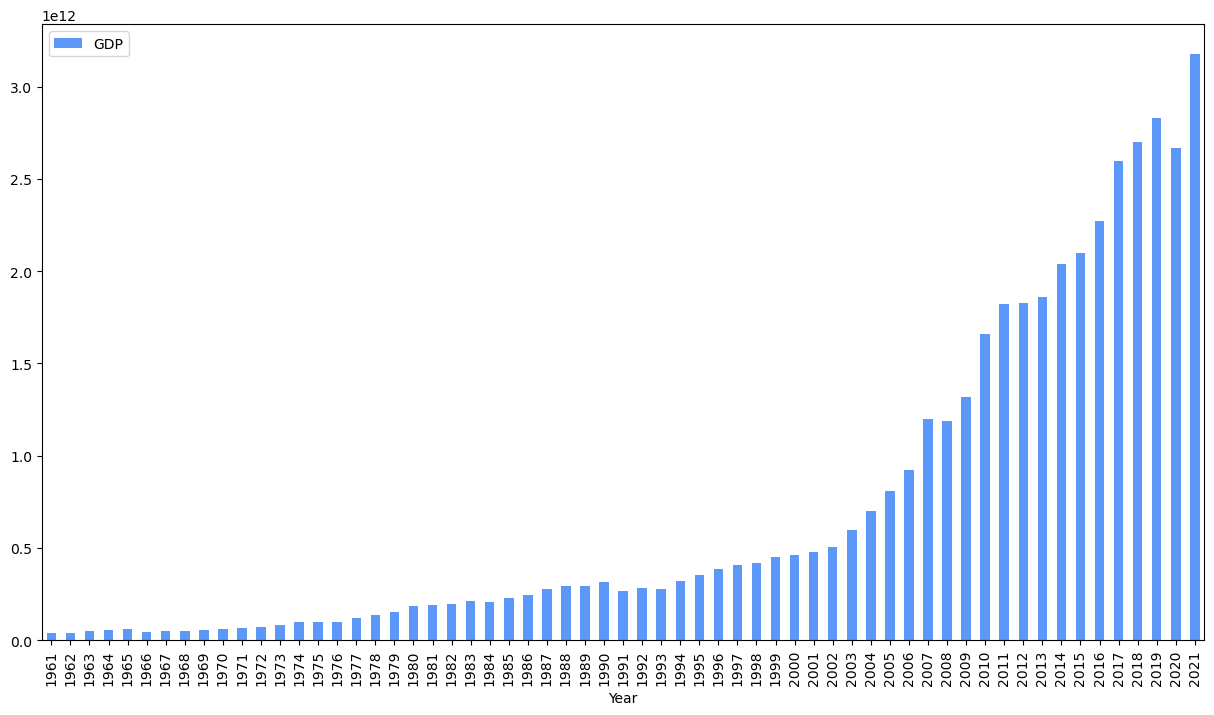

In [7]:
data.plot('Year','GDP',kind='bar',figsize=(15,8),color='#5c98f9')

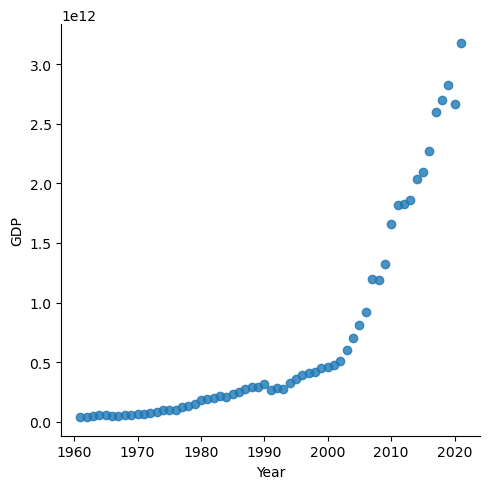

In [8]:
sns.lmplot(x='Year',y='GDP',data=data,fit_reg=False)

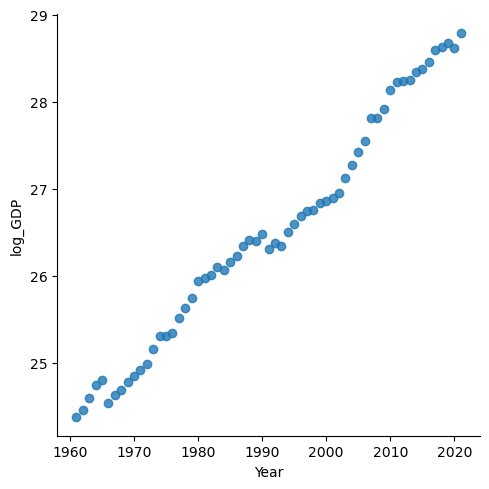

In [9]:
data['log_GDP']=np.log(data['GDP'])
data.drop('GDP',axis=1,inplace=True)
sns.lmplot(x='Year',y='log_GDP',data=data,fit_reg=False)

In [61]:
#train = data[:57]
#test = data[57:]

from sklearn.model_selection import train_test_split
train,test=train_test_split(data)

x_train = train.iloc[:,:1]
y_train = train.iloc[:,1:]
x_test = test.iloc[:,:1]
y_test = test.iloc[:,1:]

0.026


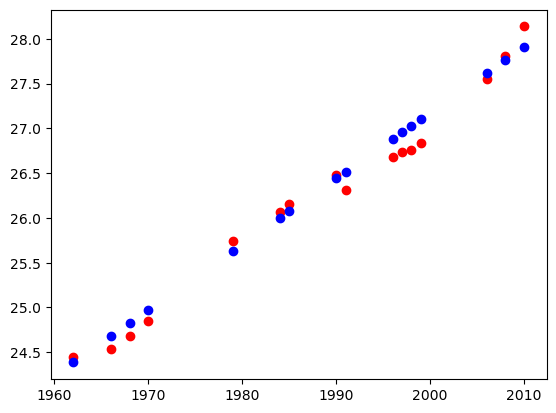

In [62]:
#:Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
ycap = model.predict(x_test)
print(round(mean_squared_error(y_test,ycap),3))

plt.plot(test['Year'],test['log_GDP'],'ro')
plt.plot(test['Year'],ycap,'bo')
plt.show()

0.014


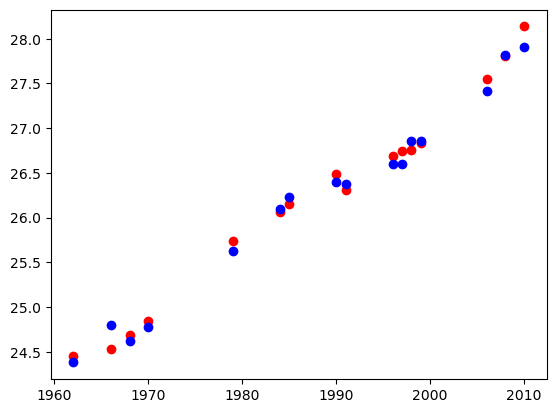

In [63]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor().fit(x_train,y_train)
ycap2 = model2.predict(x_test)
print(round(mean_squared_error(y_test,ycap2),3))

plt.plot(test['Year'],test['log_GDP'],'ro')
plt.plot(test['Year'],ycap2,'bo')
plt.show()

0.008


C:\Users\shivy\AppData\Local\Temp\ipykernel_17256\36453664.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3 = RandomForestRegressor().fit(x_train,y_train)


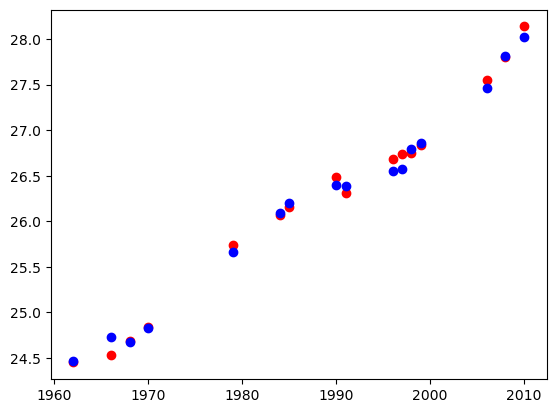

In [64]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor().fit(x_train,y_train)
ycap3 = model3.predict(x_test)
print(round(mean_squared_error(y_test,ycap3),3))

plt.plot(test['Year'],test['log_GDP'],'ro')
plt.plot(test['Year'],ycap3,'bo')
plt.show()

In [69]:
np.exp(model.predict([[2023]]))

C:\Users\shivy\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.4396543e+12]])

In [70]:
import pickle
pickle.dump(model3,open('GDP_Model.pickle','wb'))